In [1]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Imports

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

%matplotlib inline

# Spacy NLP Model

In [1]:
from pipeline.preprocessing import load_spacy_model

nlp = load_spacy_model(output_type='text', tokenizer_only=True)

sample_text = 'Jane was leading the race - she was going to win the gold medal.'
nlp(sample_text)

Added lemmatizer pipe
Added stopwords and punctuation pipe
Loading spaCy model with list of token text strings as output.
Loading tokenizer only - disabling: ['tagger', 'parser', 'ner'].


['jane', 'lead', 'race', 'win', 'gold', 'medal']

# Data

In [2]:
from pipeline.data import load_event_data, load_metadata, load_metadata_with_triggers

## Event Data

In [3]:
event_data = load_event_data(nlp=nlp)
event_data.head()

,event_id,filename,group,sentence_text,event_text,reviewed,Near Miss Event,labels,tokens
0,a080918_e9_1443_annual_09_13904956_0,a080918_e9_1443_annual_09_13904956.json,0,following the completion of the hole and loggi...,following the completion of the hole and loggi...,True,False,0,"[follow, completion, hole, log, core, lack, ev..."
1,a080918_e9_1443_annual_09_13904956_15,a080918_e9_1443_annual_09_13904956.json,0,photos of core c: yaringa e9_1443_annual_09.do...,mineral drillholes data 2. lithology summary a...,True,False,0,"[mineral, drillholes, datum, 2, lithology, sum..."
2,a080918_e9_1443_annual_09_13904956_18,a080918_e9_1443_annual_09_13904956.json,0,introduction the company has identified the on...,several suitable target areas were identified ...,True,False,0,"[suitable, target, area, identify, area, apply..."
3,a080918_e9_1443_annual_09_13904956_21,a080918_e9_1443_annual_09_13904956.json,0,parts of the adjacent coolcalalaya rift are al...,the gascoyne platform is a diamond shaped area...,True,False,0,"[gascoyne, platform, diamond, shape, area, cov..."
4,a080918_e9_1443_annual_09_13904956_34,a080918_e9_1443_annual_09_13904956.json,0,"a recent detailed analysis of drilling, seismi...",bromine levels in the halite are high (up to 3...,True,True,1,"[bromine, level, halite, high, 330ppm, suggest..."


## Metadata

In [4]:
metadata = load_metadata()
metadata.head()

,filename,anumber,title,author,company,report_type,project,operator,abstract,keywords,commodity,report_year,date_released,date_from,date_to,year_from,year_to,geometry
0,a084471_c261-1997_a2009_12342930.json,84471,"Stormbreaker Project C261/1997 E77/1327, E77/1...",PARKER K,None,Annual,Stormbreaker,HANNANS REWARD LTD,Annual Report - Stormbreaker (01/07/2008 - 30/...,Geophysics,GOLD,2009-01-01,2015-05-22,2008-01-01 00:07:00,2009-01-30 00:06:00,2008-01-01,2009-01-01,"POLYGON ((119.65148 -32.36666, 119.65148 -32.3..."
1,a084471_botanica consulting-flora survey repor...,84471,"Stormbreaker Project C261/1997 E77/1327, E77/1...",PARKER K,None,Annual,Stormbreaker,HANNANS REWARD LTD,Annual Report - Stormbreaker (01/07/2008 - 30/...,Geophysics,GOLD,2009-01-01,2015-05-22,2008-01-01 00:07:00,2009-01-30 00:06:00,2008-01-01,2009-01-01,"POLYGON ((119.65148 -32.36666, 119.65148 -32.3..."
2,a078037_e28_1599_2007a_12932344.json,78037,Yindi Project E28/1599 Annual Report Report Pe...,MURPHY J E,None,Annual,Cowarna,JACKSON MINERALS LTD,M13409/0: Cowarna gold exploration: (Annual Re...,Geological reconnaissance; Geology; Target gen...,GOLD,2008-01-01,2010-04-28,2007-01-19 00:02:00,2008-01-18 00:02:00,2007-01-01,2008-01-01,"POLYGON ((122.41668 -30.36666, 122.41667 -30.3..."
3,a081367_p77_3604_2008ar_15206645.json,81367,PARKER DOME PROJECT ANNUAL REPORT FOR THE PERI...,SIMMONS R,None,Annual,PARKER DOME,SOUTHERN CROSS GOLDFIELDS LTD,Annual Report - PARKER DOME (21/12/2007 - 20/1...,Data review,GOLD,2009-01-01,2012-08-29,2007-01-21 00:12:00,2008-01-20 00:12:00,2007-01-01,2008-01-01,"POLYGON ((119.58832 -31.81332, 119.58831 -31.8..."
4,a081367_vlist_p77_3604_ar_2008_15211599.json,81367,PARKER DOME PROJECT ANNUAL REPORT FOR THE PERI...,SIMMONS R,None,Annual,PARKER DOME,SOUTHERN CROSS GOLDFIELDS LTD,Annual Report - PARKER DOME (21/12/2007 - 20/1...,Data review,GOLD,2009-01-01,2012-08-29,2007-01-21 00:12:00,2008-01-20 00:12:00,2007-01-01,2008-01-01,"POLYGON ((119.58832 -31.81332, 119.58831 -31.8..."


## Metadata with Triggers

In [5]:
metadata_triggers = load_metadata_with_triggers(nlp=nlp)
metadata_triggers.head()

Matching sentences in files with trigger phrases: 100%|██████████| 100/100 [00:01<00:00, 50.06it/s]


,filename,idx,triggers,anumber,title,author,company,report_type,project,operator,abstract,keywords,commodity,report_year,date_released,date_from,date_to,year_from,year_to,geometry
0,a084471_c261-1997_a2009_12342930.json,99,proposed,84471,"Stormbreaker Project C261/1997 E77/1327, E77/1...",PARKER K,None,Annual,Stormbreaker,HANNANS REWARD LTD,Annual Report - Stormbreaker (01/07/2008 - 30/...,Geophysics,GOLD,2009-01-01,2015-05-22,2008-01-01 00:07:00,2009-01-30 00:06:00,2008-01-01,2009-01-01,"POLYGON ((119.65148 -32.36666, 119.65148 -32.3..."
1,a084471_c261-1997_a2009_12342930.json,133,weak,84471,"Stormbreaker Project C261/1997 E77/1327, E77/1...",PARKER K,None,Annual,Stormbreaker,HANNANS REWARD LTD,Annual Report - Stormbreaker (01/07/2008 - 30/...,Geophysics,GOLD,2009-01-01,2015-05-22,2008-01-01 00:07:00,2009-01-30 00:06:00,2008-01-01,2009-01-01,"POLYGON ((119.65148 -32.36666, 119.65148 -32.3..."
2,a084471_c261-1997_a2009_12342930.json,134,weak,84471,"Stormbreaker Project C261/1997 E77/1327, E77/1...",PARKER K,None,Annual,Stormbreaker,HANNANS REWARD LTD,Annual Report - Stormbreaker (01/07/2008 - 30/...,Geophysics,GOLD,2009-01-01,2015-05-22,2008-01-01 00:07:00,2009-01-30 00:06:00,2008-01-01,2009-01-01,"POLYGON ((119.65148 -32.36666, 119.65148 -32.3..."
3,a084471_c261-1997_a2009_12342930.json,192,likely,84471,"Stormbreaker Project C261/1997 E77/1327, E77/1...",PARKER K,None,Annual,Stormbreaker,HANNANS REWARD LTD,Annual Report - Stormbreaker (01/07/2008 - 30/...,Geophysics,GOLD,2009-01-01,2015-05-22,2008-01-01 00:07:00,2009-01-30 00:06:00,2008-01-01,2009-01-01,"POLYGON ((119.65148 -32.36666, 119.65148 -32.3..."
4,a084471_c261-1997_a2009_12342930.json,195,proposed,84471,"Stormbreaker Project C261/1997 E77/1327, E77/1...",PARKER K,None,Annual,Stormbreaker,HANNANS REWARD LTD,Annual Report - Stormbreaker (01/07/2008 - 30/...,Geophysics,GOLD,2009-01-01,2015-05-22,2008-01-01 00:07:00,2009-01-30 00:06:00,2008-01-01,2009-01-01,"POLYGON ((119.65148 -32.36666, 119.65148 -32.3..."


# Vectorisation

## Word2Vec

In [7]:
from pipeline.preprocessing.vectorize import EventVectoriser
vectorizer1 = EventVectoriser()
event_vecs1 = vectorizer1.fit_transform(event_data)
event_vecs1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,...,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
event_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
a080918_e9_1443_annual_09_13904956_0,-0.676943,-1.905946,-0.952267,-0.319310,0.706698,0.996331,0.005951,-1.182796,0.197313,2.018354,0.398446,0.675316,0.036408,-0.428986,-0.501161,...,0.073982,-0.247643,0.840995,0.572791,-0.399986,0.346557,-0.743296,0.976965,-0.008101,-1.821284,0.244934,0.255943,-0.038738,-0.256947,-0.303546
a080918_e9_1443_annual_09_13904956_15,-0.232216,0.174572,-1.953250,-1.010985,1.017052,-0.424837,-0.843951,-0.495580,0.838444,1.658010,1.502695,0.455252,-0.274193,-0.027606,0.926137,...,0.684182,-0.431578,0.079748,0.875176,-1.604953,-1.423041,-1.092298,-1.532530,0.876310,-1.912003,0.299882,-2.066961,-0.194969,0.799944,-1.078052
a080918_e9_1443_annual_09_13904956_18,0.468073,-0.025060,-0.514398,-0.738165,0.721363,1.142328,-1.271006,-0.672272,-0.254407,1.973526,2.205316,0.705171,1.257580,-2.239873,0.455732,...,0.172186,-0.536413,0.864566,1.276150,-0.279433,-0.936071,-2.613996,1.548417,1.195097,0.328751,0.155432,-0.297369,-0.837254,0.029763,-0.108982
a080918_e9_1443_annual_09_13904956_21,-0.006042,-1.637267,-1.121486,-1.049943,1.191219,-0.560193,-1.849014,-1.932346,-0.510847,2.625916,1.870103,0.980281,0.627066,-2.216551,-1.499691,...,0.429074,-0.111413,-0.432551,-0.341166,-0.050973,-0.123937,-2.062265,1.885664,1.459311,0.330506,1.716406,0.040126,-0.957824,1.687603,-2.119473
a080918_e9_1443_annual_09_13904956_34,0.356380,-0.164138,-1.257609,-1.319330,2.032568,-0.559714,-2.061043,-0.314006,-0.780581,3.331246,2.647745,1.187676,0.085848,0.297340,-0.565872,...,0.207115,0.309804,1.253898,0.923787,-0.131703,-0.004227,-1.522514,1.129095,0.510091,-1.492854,2.328052,0.394536,-0.565331,1.763399,-1.666261


In [11]:
from sklearn.decomposition import IncrementalPCA    # inital reduction
from sklearn.manifold import TSNE 

def reduce_dimensions(model):
    num_dimensions = 2  # final num dimensions (2D, 3D, etc)

    vectors = [] # positions in vector space
    labels = [] # keep track of words to label our data again later
    for word in model.wv.vocab:
        vectors.append(model.wv[word])
        labels.append(word)

    # convert both lists into numpy vectors for reduction
    vectors = np.asarray(vectors)
    labels = np.asarray(labels)

    # reduce using t-SNE
    vectors = np.asarray(vectors)
    tsne = TSNE(n_components=num_dimensions, random_state=0)
    vectors = tsne.fit_transform(vectors)

    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    return x_vals, y_vals, labels

def plot_with_matplotlib(x_vals, y_vals, labels):
    random.seed(0)
    plt.figure(figsize=(12, 12))
    plt.scatter(x_vals, y_vals)
    indices = list(range(len(labels)))
    selected_indices = random.sample(indices, 25)
    for i in selected_indices:
        plt.annotate(labels[i], (x_vals[i], y_vals[i]))

In [15]:
x_vals, y_vals, labels = reduce_dimensions(vectorizer1.model)

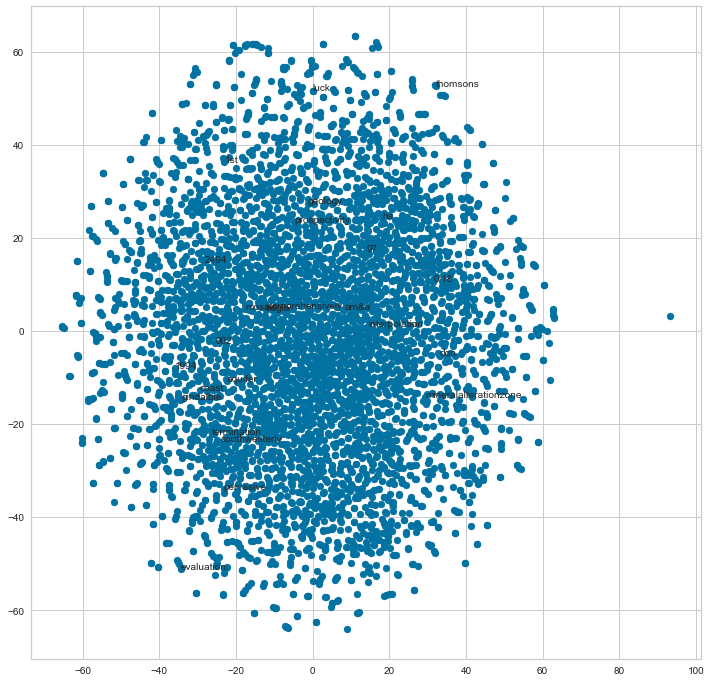

In [16]:
plot_with_matplotlib(x_vals, y_vals, labels)

## TFIDF

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

vectorizer2 = Pipeline([
        ('tfidf', TfidfVectorizer(min_df=2, tokenizer = nlp, sublinear_tf = True)),
        ('svd', TruncatedSVD(n_components=50))])

event_vecs2 = vectorizer2.fit_transform(event_data.event_text)
event_vecs2 = pd.DataFrame(event_vecs2, index=event_data.event_id)
event_vecs2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,...,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
event_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
a080918_e9_1443_annual_09_13904956_0,0.130181,0.001976,0.003229,0.011495,0.014064,0.005605,-0.012947,-0.013410,0.065222,0.028547,-0.043013,0.006954,-0.006698,0.026041,-0.024333,...,0.045660,0.048638,-0.045048,-0.051312,-0.012652,-0.086098,0.045696,-0.025261,0.051377,0.029274,0.025208,-0.030820,-0.012418,0.060585,0.035058
a080918_e9_1443_annual_09_13904956_15,0.191116,-0.075727,-0.099750,-0.019728,-0.017186,-0.001099,0.051305,-0.011098,0.024436,0.015472,0.017345,-0.041304,-0.020594,-0.048974,0.013422,...,0.133868,0.045731,0.040114,0.046278,0.055850,0.024620,0.031386,0.034091,-0.008632,0.037066,0.010126,-0.001077,-0.054034,0.053912,-0.032523
a080918_e9_1443_annual_09_13904956_18,0.183741,-0.059686,-0.117408,-0.033159,0.028726,0.065160,0.000322,0.043110,0.001946,0.010696,-0.004101,0.014197,-0.047369,-0.038765,-0.014437,...,0.078682,0.038798,-0.012007,0.054012,0.015914,0.069499,0.033451,0.015848,0.011122,0.025342,-0.038267,0.039675,0.002300,0.093326,-0.088520
a080918_e9_1443_annual_09_13904956_21,0.173292,0.032853,-0.100483,-0.033962,-0.007427,0.067922,0.000212,-0.000933,-0.019501,-0.009917,-0.027241,0.007783,-0.055898,-0.066763,-0.013042,...,0.010364,-0.004095,0.017814,0.055769,0.027201,-0.026603,0.024233,0.006511,0.014036,0.016638,-0.007444,0.035607,0.012641,0.061333,-0.042985
a080918_e9_1443_annual_09_13904956_34,0.178182,-0.034085,-0.050886,0.025930,0.046217,0.040806,0.022621,-0.000340,0.057385,-0.009789,0.034228,-0.058600,-0.022053,-0.054146,0.018410,...,0.016128,0.053044,0.030872,0.020876,0.050104,0.028053,0.036236,0.019369,0.002547,0.064138,0.012364,0.072668,-0.007333,0.063178,0.006075


# Classification

## Train Test Split

In [18]:
X = event_data[['event_id', 'tokens']]
y = event_data['labels']

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1336, 2) (1336,)
(335, 2) (335,)


In [20]:
X_train_vec = vectorizer1.fit_transform(X_train)
X_test_vec = vectorizer1.fit_transform(X_test)

print(X_train_vec.shape)
print(X_test_vec.shape)

(1336, 50)
(335, 50)


## CosineMeanClassifier

In [21]:
from pipeline.classify import CosineMeanClassifier
from sklearn import metrics

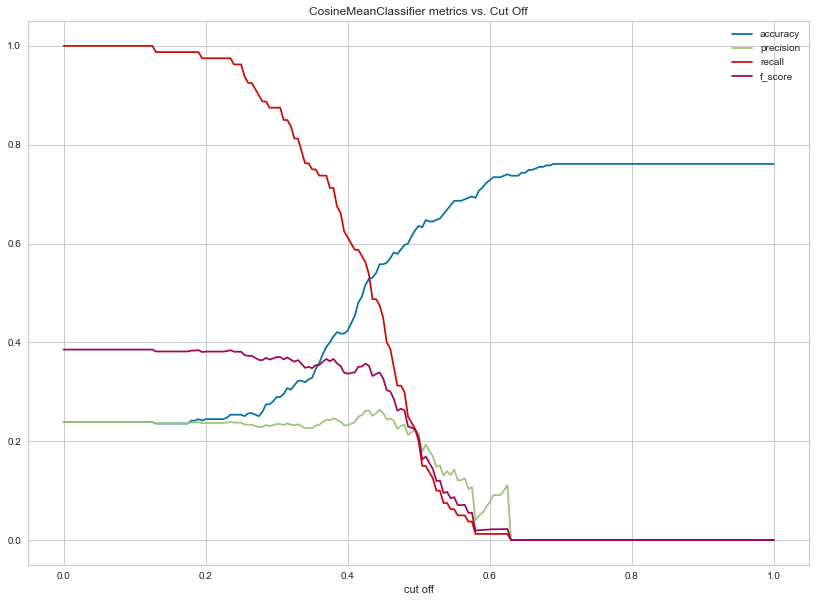

In [22]:
cutoffs = np.linspace(0., 1.0, 201)
result_data = []

for cutoff in cutoffs:
    clf = CosineMeanClassifier(cutoff=cutoff)
    clf = clf.fit(X_train_vec)
    y_pred = clf.predict(X_test_vec)
    result_data.append({
        'accuracy': metrics.accuracy_score(y_test, y_pred),
        'precision' : metrics.precision_score(y_test, y_pred, zero_division=0),
        'recall' : metrics.recall_score(y_test, y_pred, zero_division=0),
        'f_score' : metrics.f1_score(y_test, y_pred, zero_division=0)
    })
    
results = pd.DataFrame(result_data, index=cutoffs)
results.plot(figsize=(14,10), title='CosineMeanClassifier metrics vs. Cut Off', xlabel='cut off');

# Explainability with SHAP

In [25]:
from xgboost import XGBClassifier
from yellowbrick.classifier import (
    classification_report, confusion_matrix, class_prediction_error, class_balance, roc_auc
)

In [26]:
model = XGBClassifier(nestimators=100, max_depth=2).fit(X_train_vec, y_train)

[20:37:05] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { nestimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




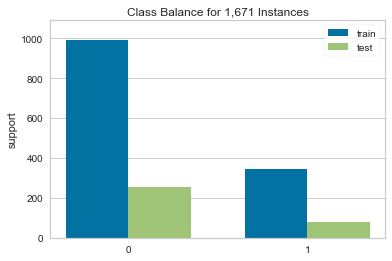

In [31]:
class_balance(y_train, y_test);

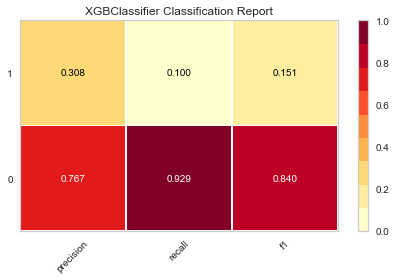

In [32]:
classification_report(model, X_train_vec, y_train, X_test_vec, y_test);

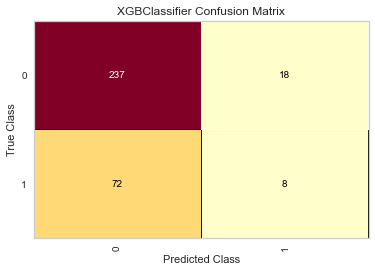

In [33]:
confusion_matrix(model, X_train_vec, y_train, X_test_vec, y_test);

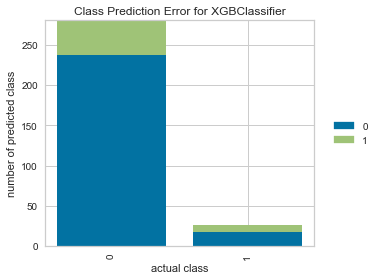

In [34]:
class_prediction_error(model, X_train_vec, y_train, X_test_vec, y_test);

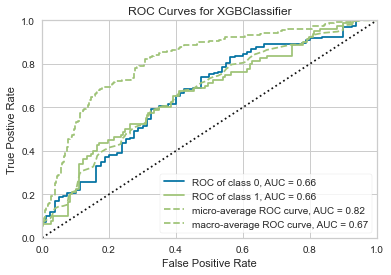

In [35]:
roc_auc(model, X_train_vec, y_train, X_test_vec, y_test);

In [36]:
import shap
shap.initjs()

In [53]:
vectors, labels = [], []
vec_model = vectorizer1.model
for word in vec_model.wv.vocab:
    vectors.append(vec_model.wv[word])
    labels.append(word)
    
labels = np.array(labels)

In [54]:
explainer = shap.Explainer(model, X_train_vec)

# One hot encoding

Load custom scikit learn cosine mean classifier and instantiate pipeline with tf-idf vectoriser

Load current labelled data and then vectorise with doc2vec

In [51]:
filename = events_path / f'group_2_labelled.csv'
df = pd.read_csv(filename)
df = df[df.columns]
df

,event_id,filename,sentence_idx,sentence_text,n_trigger_words,trigger_words_in_sentence,trigger_words_in_event,event_text,ORE_DEPOSIT,ROCK,MINERAL,STRAT,LOCATION,TIMESCALE,event_label,reviewed,Near Miss Event,Key trigger phrase,Key trigger phrase
0,a081752_anrep2008eraheedy2103_15107355_16,a081752_anrep2008eraheedy2103_15107355.json,16,mineral occurrences and exploration potential ...,1,['potential'],['potential'],"bibliography bunting ja 1986, geology of the e...",[],['granite'],[],[],"['nabberu basin', 'western australia', 'wester...",[],0,True,False,NaN,NaN
1,a075210_buck_a_ el12_1_2007_11292066_235,a075210_buck_a_ el12_1_2007_11292066.json,235,further drilling in coming years will further ...,1,['further drilling'],['further drilling'],a summary of the coal tonnages within el12 1 i...,[],['coal'],[],[],[],[],0,True,False,NaN,NaN
2,a075210_buck_a_ el12_1_2007_11292066_246,a075210_buck_a_ el12_1_2007_11292066.json,246,the tenement was applied for on the 12 1 2005 ...,1,['possible'],['possible'],"keywords: ac drilling, diamond core drilling, ...",[],['ash'],"['diamond', 'sulphur']",[],"['muja', 'collie', 'ewington', 'collie']",[],0,True,False,NaN,NaN
3,a080379_e80_2574_08atr_12876104_4,a080379_e80_2574_08atr_12876104.json,4,the east kimberley halls creek orogen is widel...,2,"['potential', 'mineralisation']","['potential', 'mineralisation', 'broad']",if this work is positive drill testing of anom...,['pge'],[],"['gold', 'sulphide']",[],"['kimberley', 'halls creek orogen', 'australia']",[],0,True,False,NaN,NaN
4,a080379_e80_2574_08atr_12876104_10,a080379_e80_2574_08atr_12876104.json,10,this belt contains the portimo and penikat int...,2,"['mineralisation', 'potential']","['mineralisation', 'potential', 'mineralisatio...",the hco has a number of similarities to the to...,"['pge', 'pge']",[],[],[],[],[],0,True,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
765,a080097_microsoft word - 081110_e52_1711_parti...,a080097_microsoft word - 081110_e52_1711_parti...,30,manganese mineralisation associated with shaly...,1,['mineralisation'],"['mineralisation', 'mineralisation']",the sylvania dome and areas to the south overl...,[],[],"['diamonds', 'gold', 'manganese']",['calyie formation'],"['sylvania dome', 'bamboo']",[],0,False,NaN,NaN,NaN
766,a080097_microsoft word - 081110_e52_1711_parti...,a080097_microsoft word - 081110_e52_1711_parti...,35,the greenstones were outcropping and chip samp...,1,['extensive'],['extensive'],in all cases conductors were identified as str...,['base metal'],"['shales', 'greenstones', 'greenstones', 'quar...",['gold'],[],[],[],0,False,NaN,NaN,NaN
767,a080097_microsoft word - 081110_e52_1711_parti...,a080097_microsoft word - 081110_e52_1711_parti...,38,anaconda nickel ltd conducted a shallow rc and...,1,['potential'],"['mineralisation', 'potential']",this prospect is currently inactive due to nat...,[],"['laterite', 'laterites']",['nickel'],[],[],[],0,False,NaN,NaN,NaN
768,a080097_microsoft word - 081110_e52_1711_parti...,a080097_microsoft word - 081110_e52_1711_parti...,43,the focus of the work was to identify areas of...,2,"['potential', 'mineralisation']","['potential', 'mineralisation']",exploration exploration work completed over th...,[],['lag'],"['gold', 'gold']",[],[],[],0,False,NaN,NaN,NaN


In [52]:
df[['STRAT', 'ROCK', 'LOCATION', 'MINERAL', 'ORE_DEPOSIT', 'TIMESCALE']]

,STRAT,ROCK,LOCATION,MINERAL,ORE_DEPOSIT,TIMESCALE
0,[],['granite'],"['nabberu basin', 'western australia', 'wester...",[],[],[]
1,[],['coal'],[],[],[],[]
2,[],['ash'],"['muja', 'collie', 'ewington', 'collie']","['diamond', 'sulphur']",[],[]
3,[],[],"['kimberley', 'halls creek orogen', 'australia']","['gold', 'sulphide']",['pge'],[]
4,[],[],[],[],"['pge', 'pge']",[]
...,...,...,...,...,...,...
765,['calyie formation'],[],"['sylvania dome', 'bamboo']","['diamonds', 'gold', 'manganese']",[],[]
766,[],"['shales', 'greenstones', 'greenstones', 'quar...",[],['gold'],['base metal'],[]
767,[],"['laterite', 'laterites']",[],['nickel'],[],[]
768,[],['lag'],[],"['gold', 'gold']",[],[]


In [59]:
df.index.to_frame()

,0
0,0
1,1
2,2
3,3
4,4
...,...
765,765
766,766
767,767
768,768


In [65]:
df.loc[0,'ROCK']

"['granite']"

In [62]:
def get_onehot_features(df):
    from sklearn.preprocessing import MultiLabelBinarizer
    mlb = MultiLabelBinarizer()

    # temp func
    def to_list(x):
        if isinstance(x, str):
            return x.split(',')
        else:
            return ['unknown']
        
    frames = []
    for feature in ['STRAT', 'ROCK', 'LOCATION', 'MINERAL', 'ORE_DEPOSIT', 'TIMESCALE']:
        s = df[feature].apply(to_list)
        wide_df = pd.DataFrame(mlb.fit_transform(s), columns=mlb.classes_, index=df.index)
        wide_df = wide_df.add_prefix(f'{feature}_')
        frames.append(wide_df)
    return pd.concat(frames)

In [63]:
get_onehot_features(df)

,STRAT_ 'bangemall group'],STRAT_ 'biscay formation'],STRAT_ 'brockman iron formation',STRAT_ 'brockman iron formation'],STRAT_ 'buldania granitoid complex'],STRAT_ 'burt range formation',STRAT_ 'burt range formation'],STRAT_ 'buttons formation',STRAT_ 'buttons formation'],STRAT_ 'corunna downs granitoid complex'],...,TIMESCALE_['phanerozoic'],TIMESCALE_['pleistocene',TIMESCALE_['pleistocene'],TIMESCALE_['precambrian',TIMESCALE_['proterozoic',TIMESCALE_['proterozoic'],TIMESCALE_['tertiary',TIMESCALE_['tertiary'],TIMESCALE_['tournaisian'],TIMESCALE_[]
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
767,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
768,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
